In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

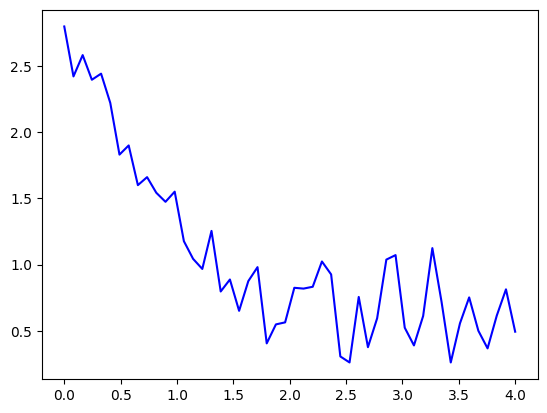

In [3]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

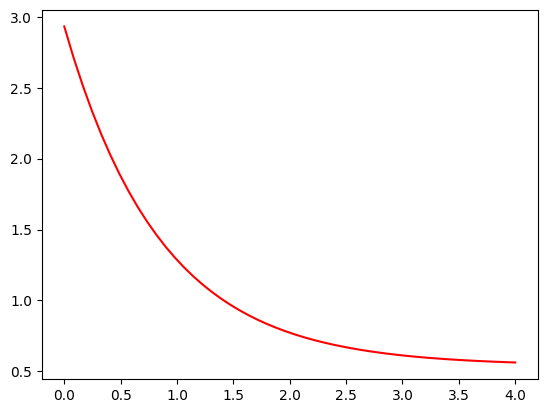

In [4]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [5]:
import json

In [8]:
y = json.load(open("/Users/yinxiaogang/Documents/2025/cs336_2025/assignment3-scaling/data/isoflops_curves.json"))

In [10]:
min_loss = {}
min_loss_pair = {}
for test in y:
    if test["compute_budget"] not in min_loss or test["final_loss"] < min_loss[test["compute_budget"]]:
        min_loss[test["compute_budget"]] = test["final_loss"]
        min_loss_pair[test["compute_budget"]] = test["parameters"]

In [35]:
C = []
N = []
for c, n in sorted(min_loss_pair.items()):
    print(c, n, c/(6*n)/n)
    C.append(c)
    N.append(n)

6e+18 762093419 1.7218034645274298
1e+19 806647749 2.561420595303711
3e+19 1536852354 2.1169261660709755
6e+19 1952041776 2.624350178083856
1e+20 3253402960 1.5746101068503133
3e+20 5903836027 1.4345028999495435
6e+20 6971055968 2.0577985692201377
1e+21 6859328563 3.542301616712086
3e+21 12148905329 3.3876279602099935


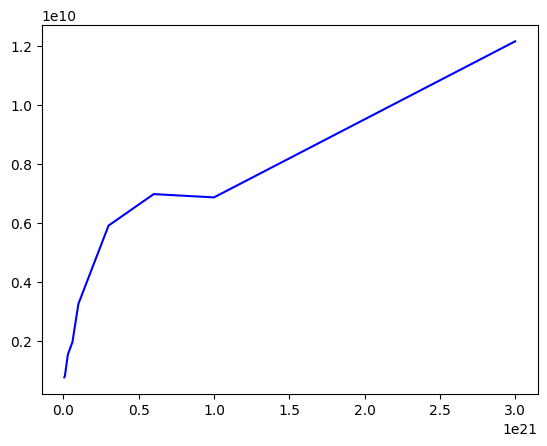

In [21]:
plt.plot(C, N, 'b-', label='data')

In [27]:
def func_N_C(x, a, b, c):
    return a * (x ** b) + c
popt, pcov = curve_fit(func_N_C, C, N, maxfev=5000)
popt
#plt.plot(xdata, func_N_C(xdata, *popt), 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 1.35024658e+03,  3.25313449e-01, -1.19220472e+09])

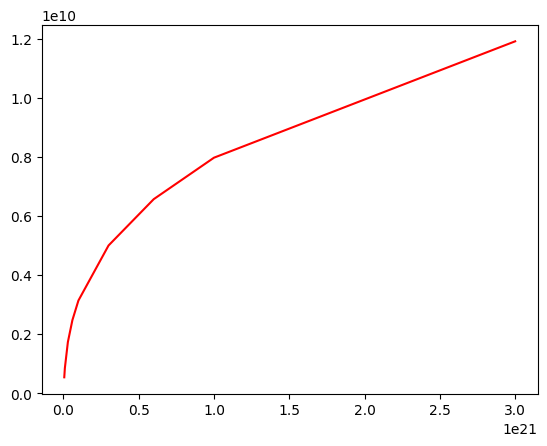

In [29]:
plt.plot(C, func_N_C(C, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [30]:
func_N_C(1e23, *popt)

np.float64(39792556129.79085)

In [31]:
func_N_C(1e24, *popt)

np.float64(85491178611.99681)

In [37]:
1e24/(85491178611.99681 ** 2)/6


22.80374315051881

In [38]:
1e23/(39792556129.79085 ** 2)/6

10.525556686264165

/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')
/var/folders/cj/0z64hm897lj40xc77xmmjcs00000gn/T/ipykernel_3848/1305866532.py:18: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecol

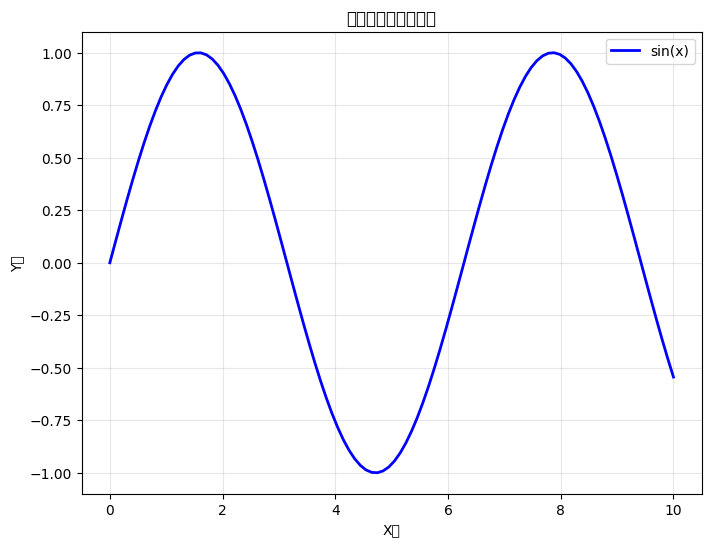

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 绘制示例图表
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='sin(x)', color='blue', linewidth=2)
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.title('正弦曲线（矢量图）')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 保存为SVG矢量图（核心：后缀改为.svg）
# SVG是纯矢量格式，支持编辑（如用Inkscape、Illustrator修改）
plt.savefig('sin_plot.svg', dpi=300, bbox_inches='tight', facecolor='white')

# 也可以保存为PDF矢量图（同样无损）
# plt.savefig('sin_plot.pdf', dpi=300, bbox_inches='tight', facecolor='white')

# 3. 显示图表
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the followin

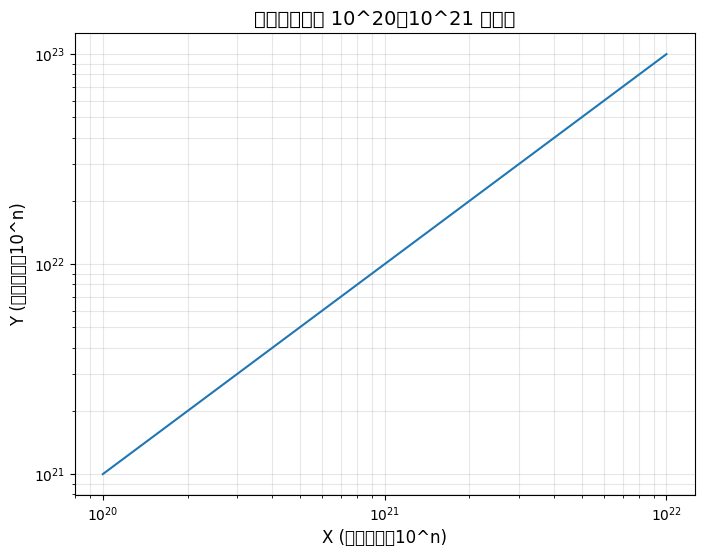

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Heiti SC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号方块
# 1. 生成对数尺度的示例数据
x = np.logspace(20, 22, 100)  # x轴：10^20 ~ 10^22（对数均分）
y = np.logspace(21, 23, 100)  # y轴：10^21 ~ 10^23

# 2. 创建画布
fig, ax = plt.subplots(figsize=(8, 6))

# 3. 绘制折线
ax.plot(x, y)

# 4. 配置对数坐标轴
ax.set_xscale('log')  # x轴设为对数刻度
ax.set_yscale('log')  # y轴设为对数刻度

# 5. 自定义刻度：强制显示 10^20、10^21 等格式
from matplotlib.ticker import LogFormatterMathtext
ax.xaxis.set_major_formatter(LogFormatterMathtext())
ax.yaxis.set_major_formatter(LogFormatterMathtext())

# 可选：手动指定刻度位置（精准控制显示哪些幂次）
ax.set_xticks([1e20, 1e21, 1e22])
ax.set_yticks([1e21, 1e22, 1e23])

# 6. 标签与标题
ax.set_xlabel('X (对数刻度，10^n)', fontsize=12)
ax.set_ylabel('Y (对数刻度，10^n)', fontsize=12)
ax.set_title('坐标轴刻度为 10^20、10^21 等幂次', fontsize=14)
plt.grid(True, which="both", alpha=0.3)  # 显示对数网格

plt.show()

In [2]:
x

array([1.00000000e+20, 1.04040404e+20, 1.08080808e+20, 1.12121212e+20,
       1.16161616e+20, 1.20202020e+20, 1.24242424e+20, 1.28282828e+20,
       1.32323232e+20, 1.36363636e+20, 1.40404040e+20, 1.44444444e+20,
       1.48484848e+20, 1.52525253e+20, 1.56565657e+20, 1.60606061e+20,
       1.64646465e+20, 1.68686869e+20, 1.72727273e+20, 1.76767677e+20,
       1.80808081e+20, 1.84848485e+20, 1.88888889e+20, 1.92929293e+20,
       1.96969697e+20, 2.01010101e+20, 2.05050505e+20, 2.09090909e+20,
       2.13131313e+20, 2.17171717e+20, 2.21212121e+20, 2.25252525e+20,
       2.29292929e+20, 2.33333333e+20, 2.37373737e+20, 2.41414141e+20,
       2.45454545e+20, 2.49494949e+20, 2.53535354e+20, 2.57575758e+20,
       2.61616162e+20, 2.65656566e+20, 2.69696970e+20, 2.73737374e+20,
       2.77777778e+20, 2.81818182e+20, 2.85858586e+20, 2.89898990e+20,
       2.93939394e+20, 2.97979798e+20, 3.02020202e+20, 3.06060606e+20,
       3.10101010e+20, 3.14141414e+20, 3.18181818e+20, 3.22222222e+20,
      

In [6]:
import matplotlib.font_manager as fm

# 打印所有可用字体名称
fonts = [f.name for f in fm.fontManager.ttflist if 'Chinese' in f.name or '中文' in f.name or 'PingFang' in f.name or 'Heiti' in f.name or 'WenQuanYi' in f.name]
print("系统可用中文字体：", fonts)

系统可用中文字体： ['Heiti TC', 'Heiti TC', 'PingFang HK']


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Heiti SC
/Users/yinxiaogang/Documents/2025/cs336_2025/assignment3-scaling/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yinxiaogang/Documents/2025/cs336_2025/assignment3-scaling/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingF

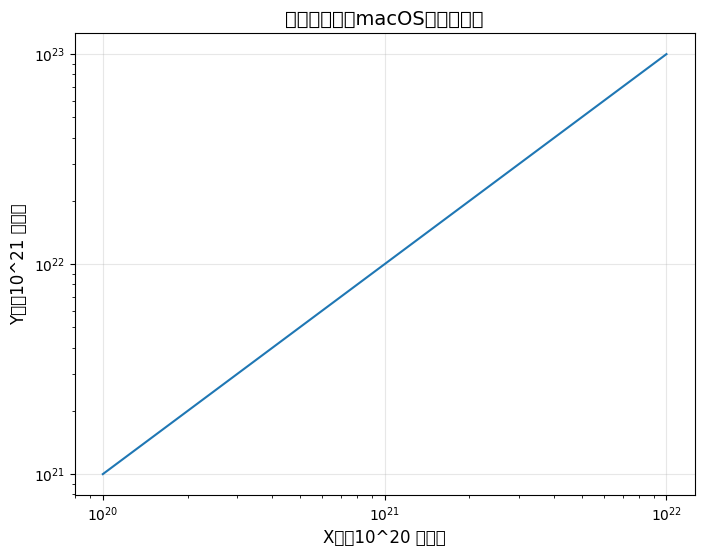

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 配置macOS中文字体（PingFang SC=苹方，Heiti SC=黑体）
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Heiti SC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号方块

# 测试绘图（含中文）
x = np.logspace(20, 22, 100)
y = np.logspace(21, 23, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('X轴（10^20 量级）', fontsize=12)
ax.set_ylabel('Y轴（10^21 量级）', fontsize=12)
ax.set_title('对数坐标轴（macOS中文显示）', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()